In [1]:
import os

import tensorflow as tf

from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, SimpleRNN
from tensorflow.keras import regularizers

import raw_data_loader as data_loader

import model_runner

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.test.gpu_device_name()

''

In [3]:
edfs_path = "../../../dataverse_files"
save_path = '../../../Results/SimpleRNN'

In [4]:
signal_segment_len = 5.0
data_split_ratio = 0.2
seed=1337

learning_rate = 0.001
epochs_n = 150
patience = 15
batch_size = 32
validation_split = 0.2

input_shape=None

### Loading data from edf files, segmenting and splitting to train and test datasets

In [5]:
X_train, X_test, y_train, y_test = data_loader.load_and_split_data(edfs_path, signal_segment_len, data_split_ratio, seed)

Not setting metadata
5771 matching events found
No baseline correction applied
0 bad epochs dropped

Epochs number per patient:  [185, 182, 182, 185, 189, 186, 182, 182, 181, 223, 183, 180, 193, 173, 169, 229, 192, 241, 178, 148, 269, 182, 237, 170, 272, 217, 227, 434]

negative:  3165
positive:  2606

X_train shape: (4616, 1250, 19)
X_test shape: (1155, 1250, 19)

input shape: (1250, 19)


In [6]:
input_shape = data_loader.input_shape
input_shape

(1250, 19)

## Models

### No dropout

In [7]:
from tensorflow.keras import layers

def build_model_SimpleRNN128_Dense32(input_shape, opt):    
    model = Sequential()
    
    model.add(SimpleRNN(128,input_shape=input_shape))
#     model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
#     model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'SimpleRNN128_Dense32'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 150
Model: "SimpleRNN128_Dense32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               18944     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23,105
Trainable params: 23,105
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
116/116 [==============================] - 21s 173ms/step - loss: 0.6459 - accuracy: 0.6148 - val_loss: 0.6099 - val_accuracy: 0.6645
Epoch 2/150
116/116 [==============================] - 20s 176ms/step - loss: 0.5469 - accuracy: 0.7207 - val_lo

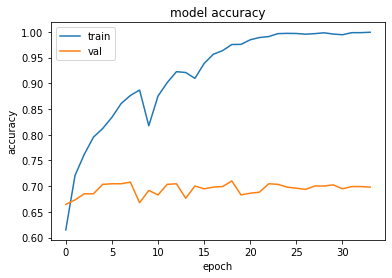

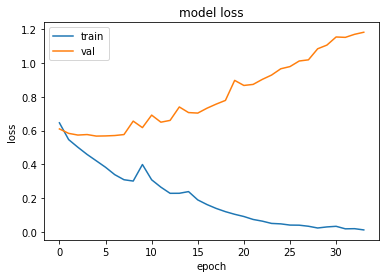

Test Accuracy: 0.6831168831168831
F1 score: 0.6995073891625616


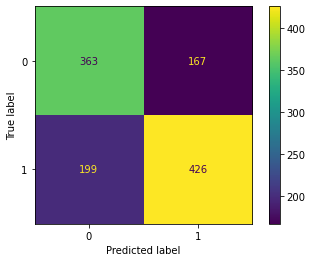

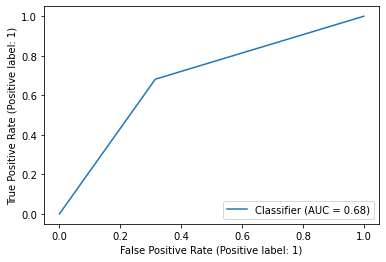

In [8]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_SimpleRNN128_Dense32, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)

### Dropout

In [9]:
from tensorflow.keras import layers

def build_model_SimpleRNN128_Drop05_Dense32_Drop04(input_shape, opt):    
    model = Sequential()
    
    model.add(SimpleRNN(128,input_shape=input_shape))
    model.add(Dropout(0.5))
    
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model._name = 'SimpleRNN128_Drop05_Dense32_Drop04'
    
    model.compile(optimizer=opt, 
          loss='binary_crossentropy',
          metrics=['accuracy'])
    
    
    model.summary()
    
    return model

batch size: 32
learning rate: 0.001
epochs: 150
Model: "SimpleRNN128_Drop05_Dense32_Drop04"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 128)               18944     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23,105
Trainable params: 23,105
Non-trainable params: 0
______________________________________________

Epoch 49/150
116/116 [==============================] - 26s 223ms/step - loss: 0.4884 - accuracy: 0.7570 - val_loss: 0.5070 - val_accuracy: 0.7392
Epoch 50/150
116/116 [==============================] - 25s 217ms/step - loss: 0.5109 - accuracy: 0.7492 - val_loss: 0.5414 - val_accuracy: 0.7208
Epoch 51/150
116/116 [==============================] - 21s 185ms/step - loss: 0.5058 - accuracy: 0.7489 - val_loss: 0.5277 - val_accuracy: 0.7284
Epoch 52/150
116/116 [==============================] - 22s 190ms/step - loss: 0.4836 - accuracy: 0.7687 - val_loss: 0.5243 - val_accuracy: 0.7424
Epoch 53/150
116/116 [==============================] - 23s 195ms/step - loss: 0.4811 - accuracy: 0.7641 - val_loss: 0.5169 - val_accuracy: 0.7294
Epoch 54/150
116/116 [==============================] - 22s 188ms/step - loss: 0.4871 - accuracy: 0.7568 - val_loss: 0.5076 - val_accuracy: 0.7468
Epoch 55/150
116/116 [==============================] - 21s 182ms/step - loss: 0.4835 - accuracy: 0.7630 - val_loss: 0

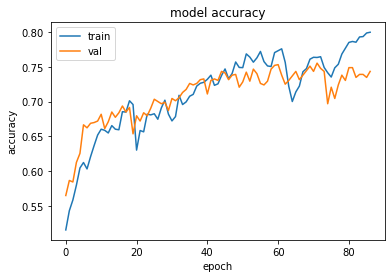

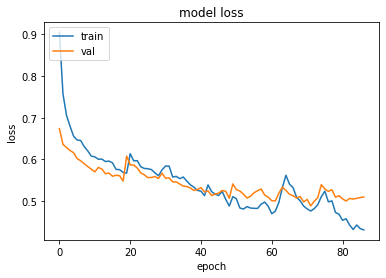

Test Accuracy: 0.7714285714285715
F1 score: 0.7843137254901961


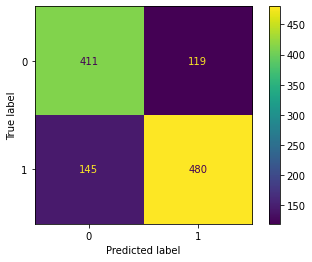

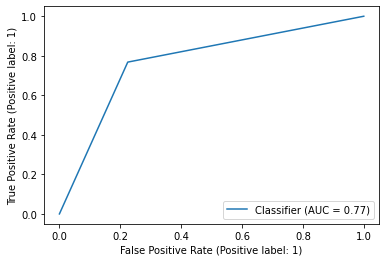

In [10]:
model_runner.run(X_train, X_test, y_train, y_test, input_shape, build_model_SimpleRNN128_Drop05_Dense32_Drop04, 
    learning_rate, epochs_n, patience, batch_size, validation_split, save_path)